Intro:
The topic of this project is to observe the AQI or air quality around the world based. Using the data provided, we have longitude and latitude to observe the air quality and particulates around the globe. The data set provides AQI values, latitude, longitdue, category of air quality (eg. Very good, good, moderate, bad, etc.), and other particulate matter that can contribute to whether the quality of air is safe.
The goal of my project is to use this data to build a model that can accurately predict what the air quality will be in the future.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Initial look at the data. What are our data types and what do we need to do to clean it up so we can start modeling.

In [88]:
df = pd.read_csv('AQI and Lat Long of Countries.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [89]:
#Clean the data
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

Below we look at the columns of interest. Omit some columns we don't need.

In [90]:
df = df.drop(['Country', 'City','NO2 AQI Value', 'NO2 AQI Category'],axis=1) #not really relevant
df.columns #look at columns

Index(['AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category',
       'Ozone AQI Value', 'Ozone AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

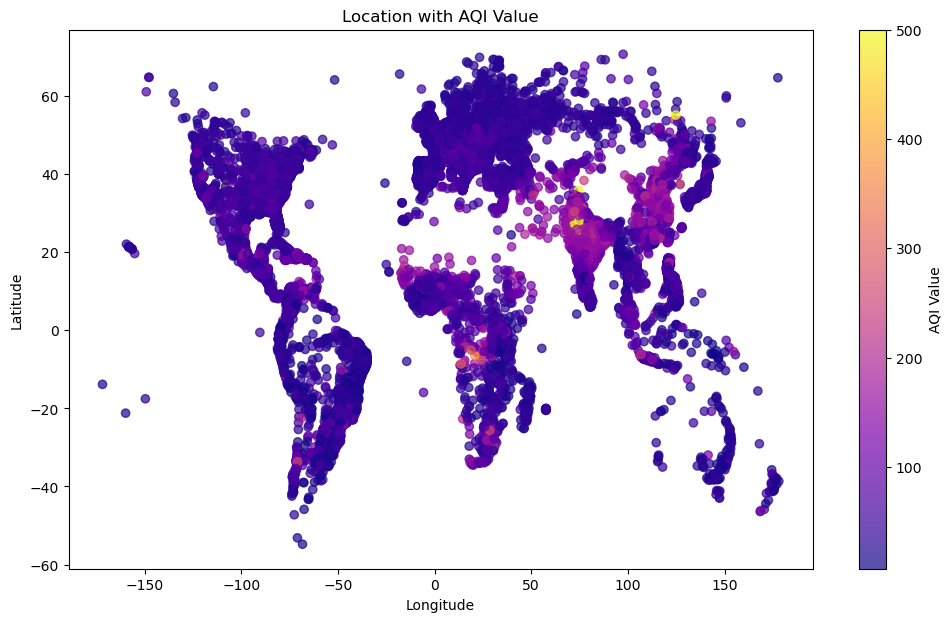

In [91]:
latitudes = df['lat']
longitudes = df['lng']
aqi_values = df['AQI Value']

# Creating a scatter plot 
plt.figure(figsize=(12,7))
scatter = plt.scatter(longitudes, latitudes, c=aqi_values, cmap='plasma', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location with AQI Value')
plt.colorbar(label='AQI Value')
plt.show()


Below we look at the data inside our column of interest in AQI Category. This isn't numerical, so encoding our data is neccessary.
The objective is to set numerical labels to each of the air quality categories and predict if the AQI will be moderate, good, unhealthy, etc. accurately.

In [92]:
df = df.drop(['lat','lng'],axis=1)
df.head()
df['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups', 'Hazardous'], dtype=object)

In [73]:
#Encode the data 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_encoded = df.copy() #making a new copy to encode my data frame
categorical_columns = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'PM2.5 AQI Category']

for column in categorical_columns: #encode each categorical column to numerical 
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

#verify the encoding 
df_encoded.head()



,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,51,2,1,0,36,0,51,2
1,41,0,1,0,5,0,41,0
2,41,0,1,0,5,0,41,0
3,66,2,1,0,39,0,66,2
4,34,0,1,0,34,0,20,0


Our data is now numerical after encoding, so we can start to split the data and modeling.

In [76]:
from sklearn.model_selection import train_test_split

# X represents the features (all columns except the target 'AQI Category') 
# y represents the target variable.
X = df_encoded.drop('AQI Category', axis=1)  # predict air quality
y = df_encoded['AQI Category']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of X and y to verify the separation
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (16695, 7)
Shape of y: (16695,)


After splitting the data above, I check the shape of the X and y to verify the data has been seperated.
Below, I use the KNN classifier and train the data.

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
#making predictions on the test set
#predict method takes the test features (X_test) as input and returns the predicted target values
y_pred = knn.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1569    0    0    0    0    0]
 [   0    9    0    0    0    0]
 [   2    0 1429    0    0    0]
 [   0    0    0  157    0    1]
 [   0    0    0    7  140    0]
 [   0    0    0    2    0   23]]


Above, the confusion matrix shows the data that was correctly classified and the misclassifications.
Below, after getting retreiving results we iterate for k values from 1 - 20 and plot the K neighbors vs accuracy. 

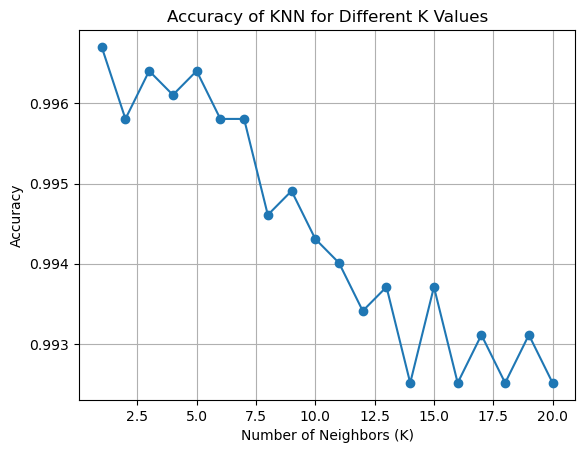

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
k_values = range(1, 21) #plot to create KNN from K = 1 - 20
best_accuracy = 0 #initializing these vars to zero
best_precision = 0
best_recall = 0
best_k = 0


accuracy_scores = []
precision_scores = []
recall_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    precision = precision_score(y_test, y_pred, average='weighted') #get prec and recall
    recall = recall_score(y_test, y_pred, average='weighted')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        best_k = k


plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN for Different K Values')
plt.grid(True)
plt.show()

In [85]:
print("Best K: ", best_k)
print("Best Accuracy: ", best_accuracy)
print("Best Precision: ", best_precision)
print("Best Recall: ", best_recall)

Best K:  1
Best Accuracy:  0.9967056004791854
Best Precision:  0.9967825913981351
Best Recall:  0.9967056004791854


Conclusion: 
Importing the AQI data and identifying the feature I wanted to predict was the main objective. Above, I cleaned the data and prepared data frames that isolated 'AQI Category' to predict whether the air quality will be Moderate, Good, Unhealthy, Very Unhealthy, Unhealthy for Sensitive Groups, and Hazardous. After using classifications methods such as KNN, I used the sklearn metrics library to give insight on the accuracy of the model by retreiving precision, recall, and even incorporated a confusion matrix.
I conclude that this model is accurate (>99%) in prediciting AQI in the given regions based off the provided latitude and longitude. 